##  Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd

## Loading Data & Overview

In [3]:
data =keras.datasets.fashion_mnist

In [4]:
(X_train, y_train) , (X_test, y_test) = data.load_data()

print(f"Length of X_train : {len(X_train)}")
print(f"Length of X_test : {len(X_test)}")
print(f"Length of y_train : {len(y_train)}")
print(f"Length of y_test : {len(y_test)}")

4422102/4422102 [==============================] - 0s 0us/step
Length of X_train : 60000
Length of X_test : 10000
Length of y_train : 60000
Length of y_test : 10000


Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of X_test (10000, 28, 28)
Shape of y_test (10000,)
-------------------------------------------
Shape of X_train[0] (28, 28)
Shape of y_train[0] ()
y_train value 9


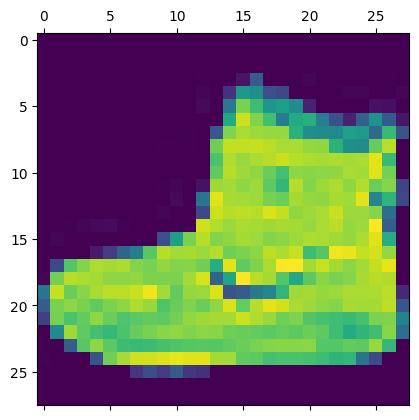

In [5]:
print(f"Shape of X_train {X_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of X_test {X_test.shape}")
print(f"Shape of y_test {y_test.shape}")
print('-------------------------------------------')
print(f"Shape of X_train[0] {X_train[0].shape}")
print(f"Shape of y_train[0] {y_train[0].shape}")

print(f"y_train value {y_train[0]}")
#print(f"X_train value {X_train[0]}")

## matshow visualizes a 2D matrix or array as color-coded image.
plt.matshow(X_train[0])
plt.show()

#### List of labels / categories in y

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Count of unique labels in the dataset

In [7]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


##  Pre-processing

#### Scaling the grayscale values in range(0,1)
- Since the values are in range of 0 to 255, to convert them in range(0,1) the values are divided by 255

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
label_dict = dict(zip(list(range(0,10)),class_labels))

## Model Building

### ANN - Method 1

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5108 - accuracy: 0.8226
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3883 - accuracy: 0.8617
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3463 - accuracy: 0.8742
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3216 - accuracy: 0.8823
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3050 - accuracy: 0.8880
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2873 - accuracy: 0.8943
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2753 - accuracy: 0.8986
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2645 - accuracy: 0.9027
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2543 - accuracy: 0.9049
Epoch 10/10
313/313 [==============================] - 1s 3ms/step
(10000, 10)


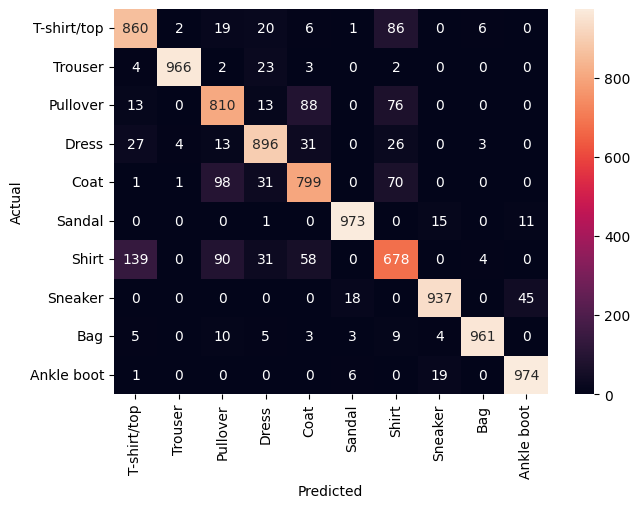

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test, y_test)
y_predicted = model.predict(X_test)
print(y_predicted.shape)

y_pred_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

fig, ax =plt.subplots(figsize = (7,5))
sns.heatmap(cm, annot=True, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(class_labels,rotation =90)
ax.set_yticklabels(class_labels,rotation =0)
plt.show()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.81      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.81      0.80      0.80      1000
           5       0.97      0.97      0.97      1000
           6       0.72      0.68      0.70      1000
           7       0.96      0.94      0.95      1000
           8       0.99      0.96      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### ANN - Method 2

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5037 - accuracy: 0.8220
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3764 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3399 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3148 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2970 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2834 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2706 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2592 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2518 - accuracy: 0.9063
Epoch 10/10
313/313 [==============================] - 0s 1ms/step
(10000, 10)


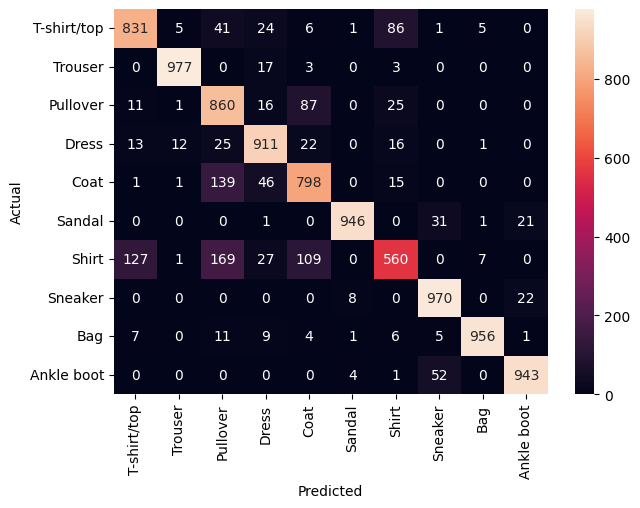

In [14]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test, y_test)
y_predicted = model.predict(X_test)
print(y_predicted.shape)

y_pred_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

fig, ax =plt.subplots(figsize = (7,5))
sns.heatmap(cm, annot=True, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(class_labels,rotation =90)
ax.set_yticklabels(class_labels,rotation =0)
plt.show()

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.69      0.86      0.77      1000
           3       0.87      0.91      0.89      1000
           4       0.78      0.80      0.79      1000
           5       0.99      0.95      0.97      1000
           6       0.79      0.56      0.65      1000
           7       0.92      0.97      0.94      1000
           8       0.99      0.96      0.97      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



### CNN Model

In [17]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation,Conv2D,MaxPooling2D

cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#b_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/dir", histogram_freq=1)

cnn.fit(X_train, y_train, epochs=10)

cnn.evaluate(X_test, y_test)
y_predicted = cnn.predict(X_test)
print(y_predicted.shape)

y_pred_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
#cm


Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4088 - accuracy: 0.8540
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2743 - accuracy: 0.9020
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2281 - accuracy: 0.9170
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1978 - accuracy: 0.9269
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1702 - accuracy: 0.9372
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1493 - accuracy: 0.9447
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1304 - accuracy: 0.9520
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1146 - accuracy: 0.9576
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0973 - accuracy: 0.9640
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
(10000, 10)


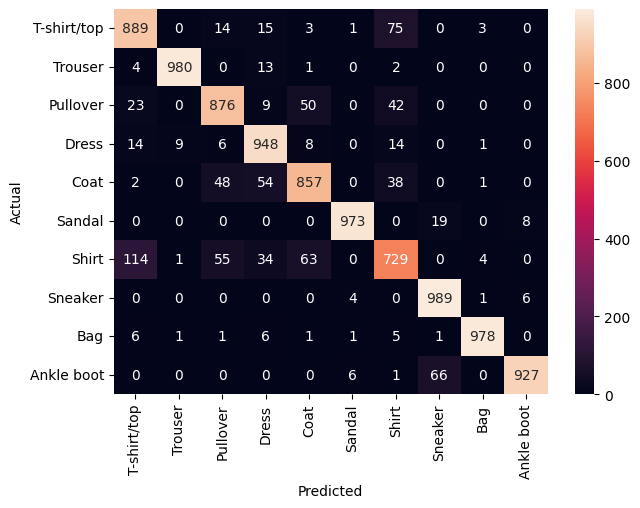

In [18]:
fig, ax =plt.subplots(figsize = (7,5))
sns.heatmap(cm, annot=True, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(class_labels,rotation =90)
ax.set_yticklabels(class_labels,rotation =0)
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.88      0.88      1000
           3       0.88      0.95      0.91      1000
           4       0.87      0.86      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.80      0.73      0.76      1000
           7       0.92      0.99      0.95      1000
           8       0.99      0.98      0.98      1000
           9       0.99      0.93      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [20]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               540900    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

### CNN -Hyper Parameter Tuned

Guide to Hyper paramter tuning:https://keras.io/guides/keras_tuner/getting_started/

Other Links:https://youtu.be/OzLAdpqm35E?si=UwqKY2fNFfyn-Hx3

In [21]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.8 MB/s eta 0:00:00


In [22]:
print(tf.__version__)

2.15.0


In [23]:
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,4,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,4,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  return model

In [24]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-24-2bbfbe7dae29>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [25]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [26]:
tuner_search.search(X_train,y_train,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.9021666646003723

Best val_accuracy So Far: 0.9021666646003723
Total elapsed time: 00h 02m 54s


In [28]:
model=tuner_search.get_best_models(num_models=1)[0]
model.fit(X_train,y_train, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 10s 5ms/step - loss: 0.1811 - accuracy: 0.9326 - val_loss: 0.2628 - val_accuracy: 0.9102
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1468 - accuracy: 0.9446 - val_loss: 0.2722 - val_accuracy: 0.9113
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1168 - accuracy: 0.9560 - val_loss: 0.2954 - val_accuracy: 0.9087
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0892 - accuracy: 0.9659 - val_loss: 0.3400 - val_accuracy: 0.9138
Epoch 8/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0724 - accuracy: 0.9728 - val_loss: 0.3873 - val_accuracy: 0.9123
Epoch 9/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0609 - accuracy: 0.9767 - val_loss: 0.4229 - val_accuracy: 0.9078
Epoch 10/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0508 - accuracy: 0.9810 - val_loss: 0.4556 - val_accurac

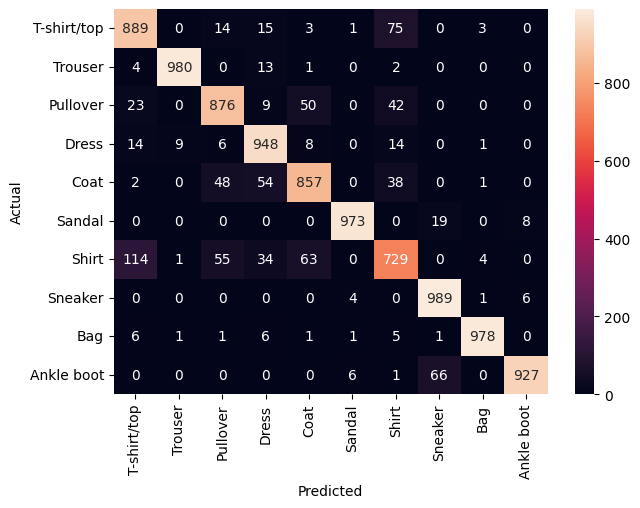

In [29]:
fig, ax =plt.subplots(figsize = (7,5))
sns.heatmap(cm, annot=True, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(class_labels,rotation =90)
ax.set_yticklabels(class_labels,rotation =0)
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.88      0.88      1000
           3       0.88      0.95      0.91      1000
           4       0.87      0.86      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.80      0.73      0.76      1000
           7       0.92      0.99      0.95      1000
           8       0.99      0.98      0.98      1000
           9       0.99      0.93      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 128)       3328      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        102432    
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 128)               1638528   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1745578 (6.66 MB)
Trainable params: 1745578 (6.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
